<a href="https://colab.research.google.com/github/guptadarsh/DemandInsight/blob/main/DemandInsight_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

- Company zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- Company has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, levene, shapiro, kruskal
from statsmodels.graphics.gofplots import qqplot

In [ ]:
y_df = pd.read_csv('bike_sharing.csv')
y_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
y_df.shape

(10886, 12)

In [ ]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
y_df.duplicated().sum()

0

In [ ]:
y_df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
y_df.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#Observation
- Datasets contain 10886 rows and 12 columns.
- No missing values are found in the dataset.
- No duplicated rows are present in the dataset.

#Univariate Analysis
- Categorical

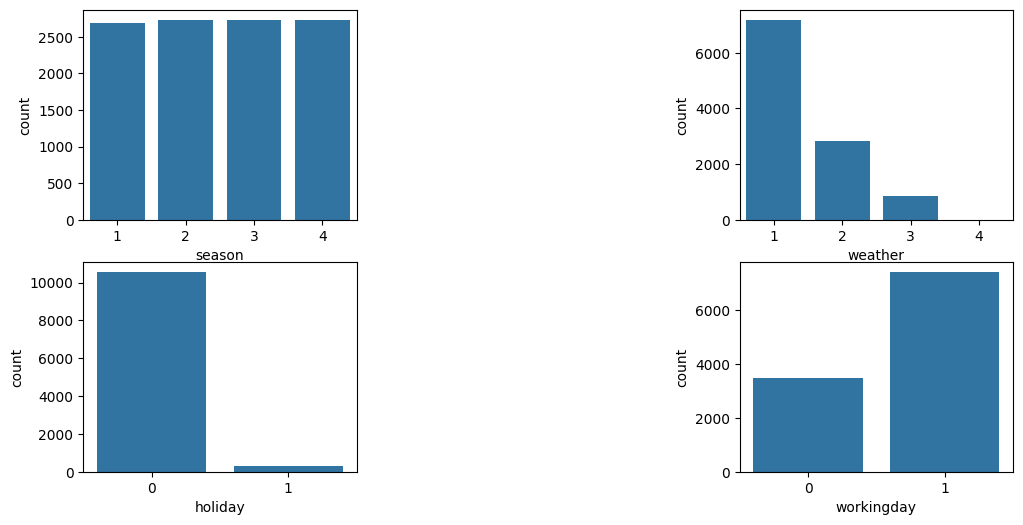

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.countplot(data = y_df, x='season')
plt.subplot(2,3,3)
sns.countplot(data=y_df, x='weather')
plt.subplot(2,3,4)
sns.countplot(data=y_df, x='holiday')
plt.subplot(2,3,6)
sns.countplot(data=y_df, x='workingday')
plt.show()

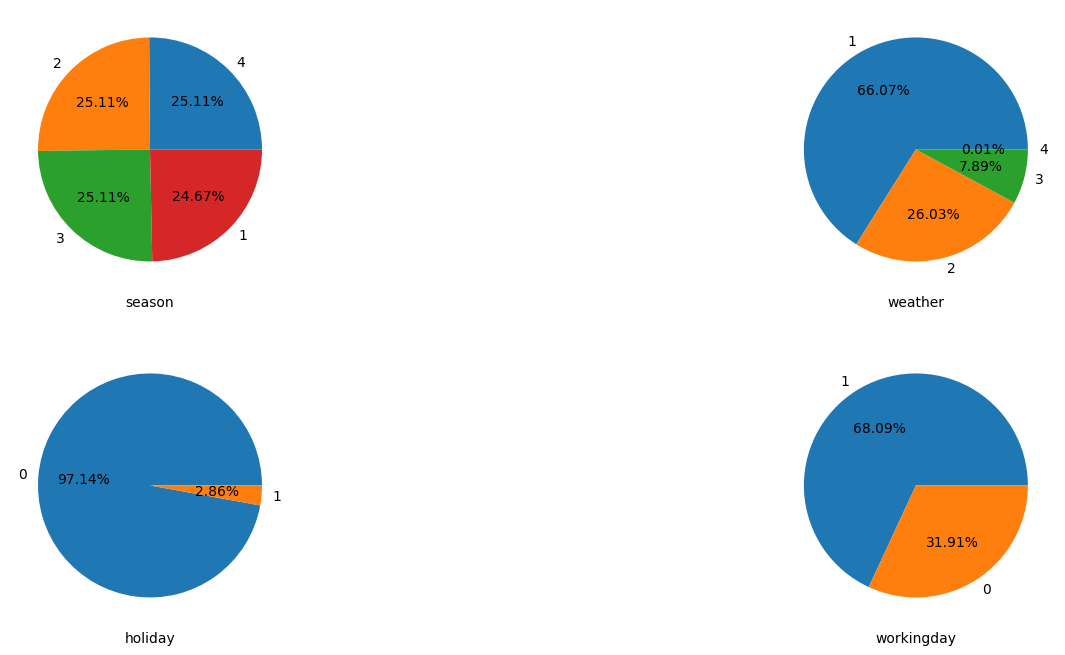

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
plt.pie(x=y_df['season'].value_counts(),
        labels=y_df['season'].value_counts().index,
        autopct='%0.2f%%')
plt.xlabel('season')
plt.subplot(2,3,3)
plt.pie(x=y_df['weather'].value_counts(),
        labels=y_df['weather'].value_counts().index,
        autopct='%0.2f%%')
plt.xlabel('weather')
plt.subplot(2,3,4)
plt.pie(x=y_df['holiday'].value_counts(),
        labels=y_df['holiday'].value_counts().index,
        autopct='%0.2f%%')
plt.xlabel('holiday')
plt.subplot(2,3,6)
plt.pie(x=y_df['workingday'].value_counts(),
        labels=y_df['workingday'].value_counts().index,
        autopct='%0.2f%%')
plt.xlabel('workingday')
plt.show()

- Numerical

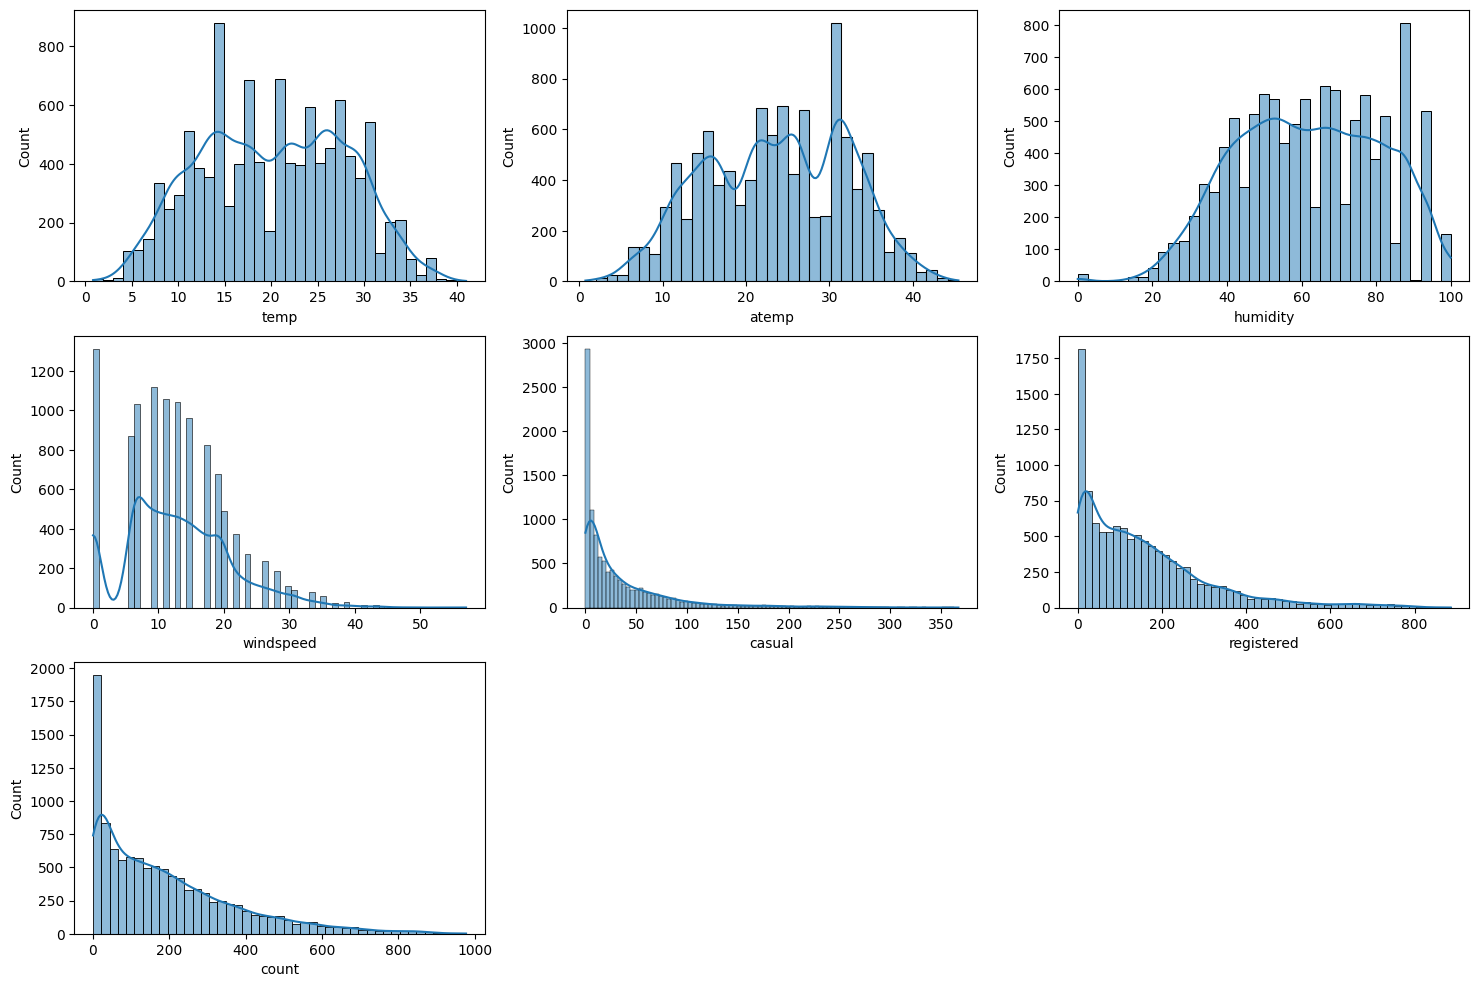

In [ ]:
plt.figure(figsize = (18, 12))
for i,j in enumerate(y_df.columns[5:]):
  plt.subplot(3, 3, i+1)
  sns.histplot(data = y_df, x = j, kde=True)
plt.show()

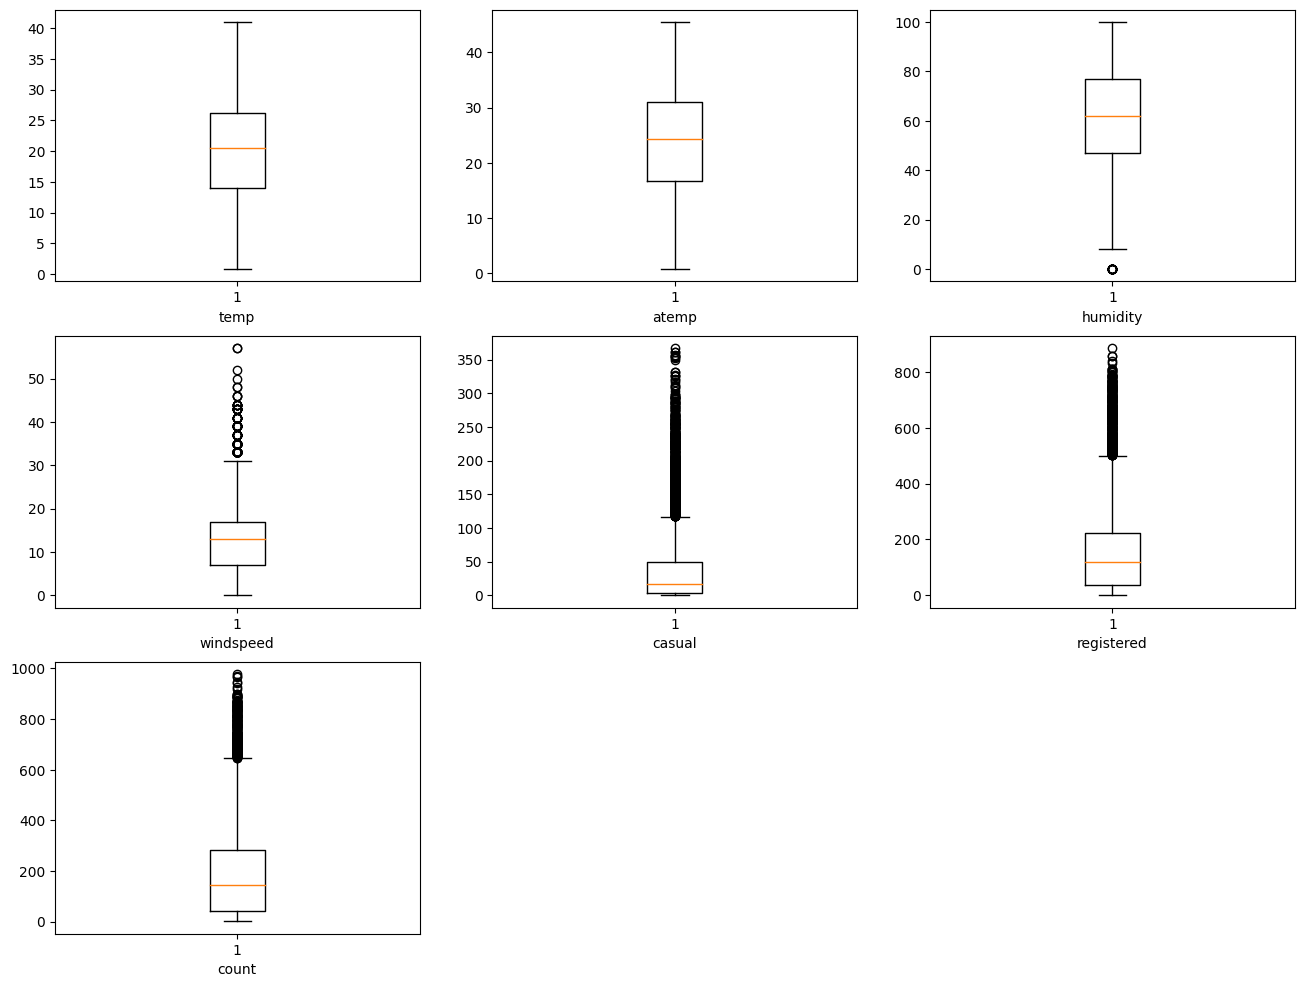

In [ ]:
plt.figure(figsize = (16, 12))
for i,j in enumerate(y_df.columns[5:]):
  plt.subplot(3, 3, i+1)
  plt.boxplot(data = y_df, x = y_df[j])
  plt.xlabel(j)
plt.show()

#Observation
- In almost all seasons, the number of rented bikes has been approximataly equal. This pattern held true for spring, summer, fall, and winter.
- There is 66.07% of bike was booked in Clear, Few clouds, partly cloudy.
- 26.03% of bikes have been booked in mist and cloudy conditions, mist and broken clouds, mist and few clouds, and mist.
- 7.89% of bikes were booked during light snow, light rain with scattered clouds, and light rain with scattered clouds and a thunderstorm.
- 0.01% of bikes were booked during heavy rain with ice pellets, thunderstorm, mist, as well as snow with fog.
- 97.14% bike has been booked during holiday.
- 68.09% bike has been booked during workingday while 31.91% bike was booked during not workingday.
- The variables windspeed, casual, registered, and count contain a high number of outliers.
- The highest number of bike bookings occurred during clear weather, few clouds, partly cloudy conditions, both on working days and holidays.

#Bivariate Analysis

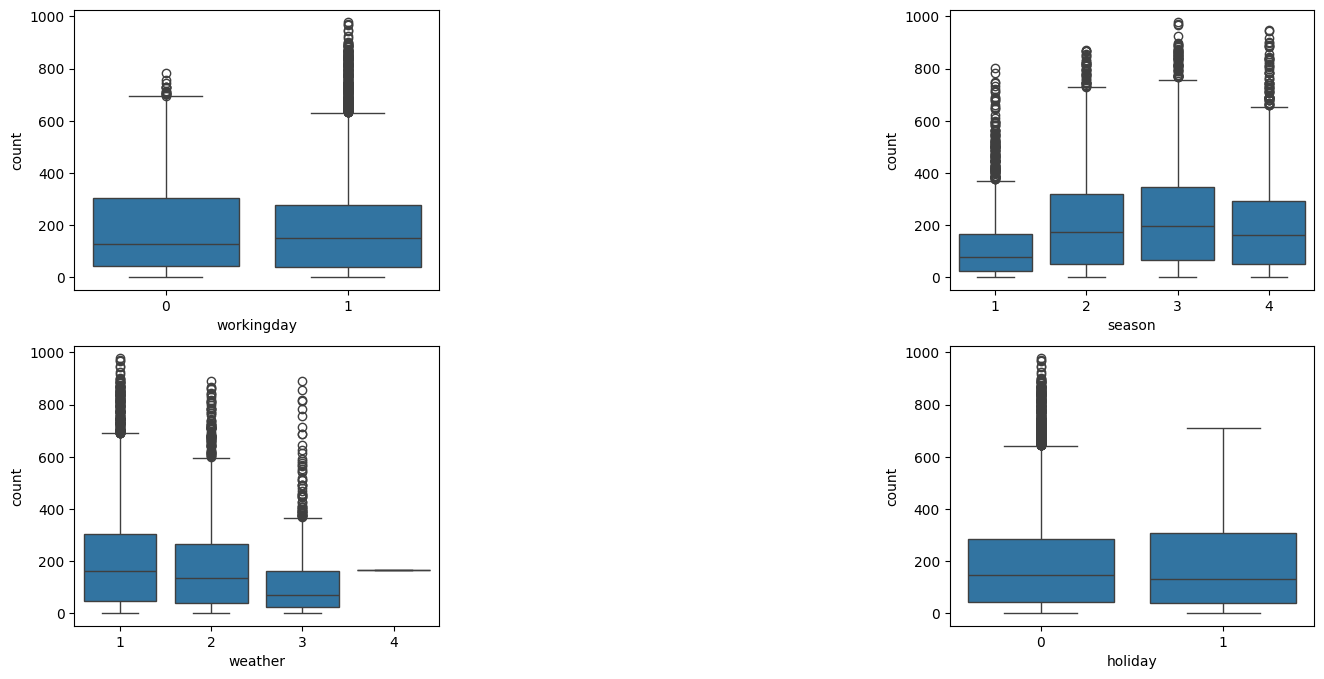

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(data=y_df, x='workingday', y='count')
plt.subplot(2,3,3)
sns.boxplot(data=y_df, x='season', y='count')
plt.subplot(2,3,4)
sns.boxplot(data=y_df, x='weather', y='count')
plt.subplot(2,3,6)
sns.boxplot(data=y_df, x='holiday', y='count')
plt.show()

[]

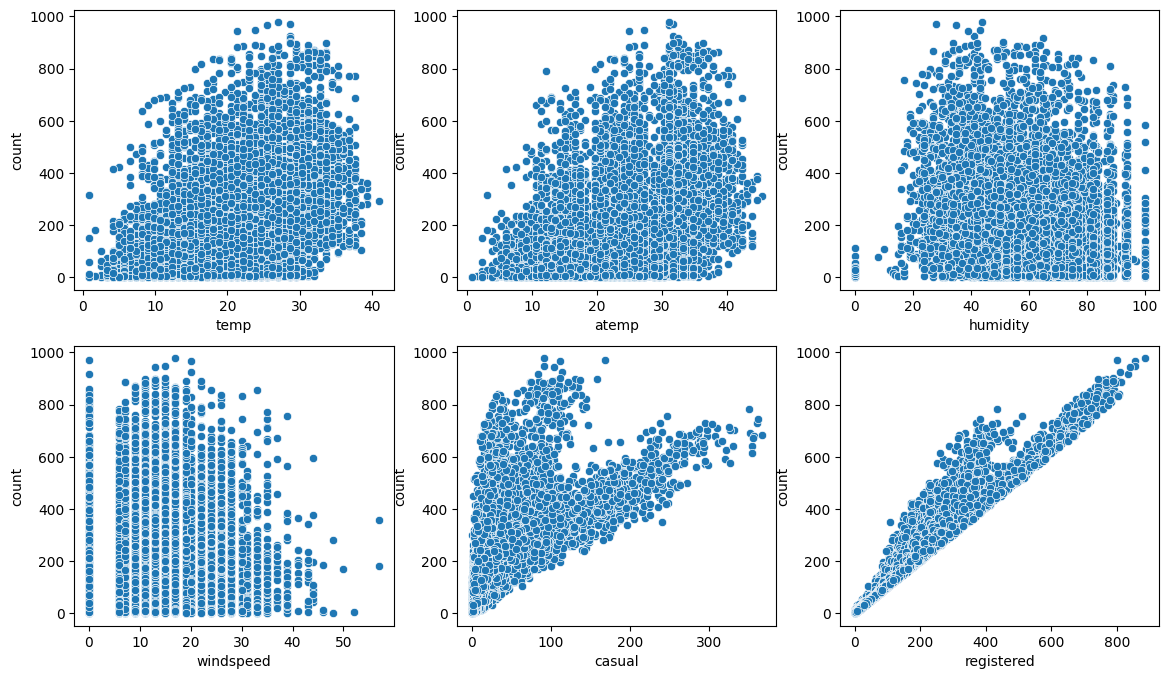

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
sns.scatterplot(data=y_df, x='temp', y='count')
plt.subplot(2,3,2)
sns.scatterplot(data=y_df, x='atemp', y='count')
plt.subplot(2,3,3)
sns.scatterplot(data=y_df, x='humidity', y='count')
plt.subplot(2,3,4)
sns.scatterplot(data=y_df, x='windspeed', y='count')
plt.subplot(2,3,5)
sns.scatterplot(data=y_df, x='casual', y='count')
plt.subplot(2,3,6)
sns.scatterplot(data=y_df, x='registered', y='count')
plt.plot()

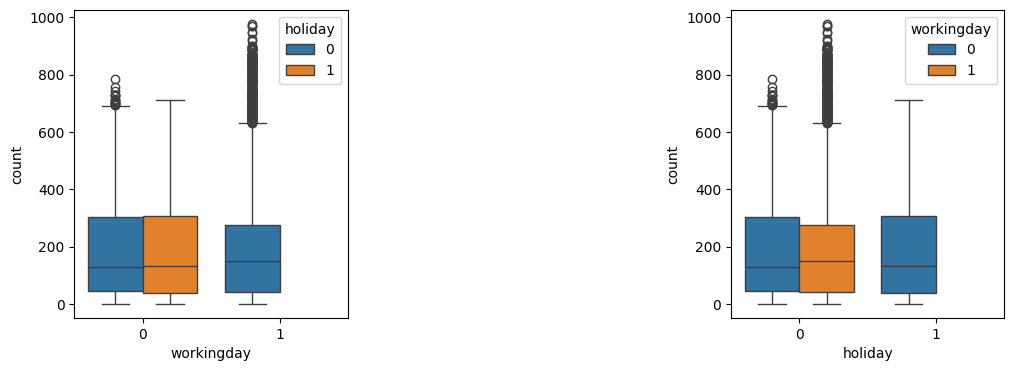

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(data=y_df, x='workingday', y='count', hue='holiday')
plt.subplot(1,3,3)
sns.boxplot(data=y_df, x='holiday', y='count', hue='workingday')
plt.show()

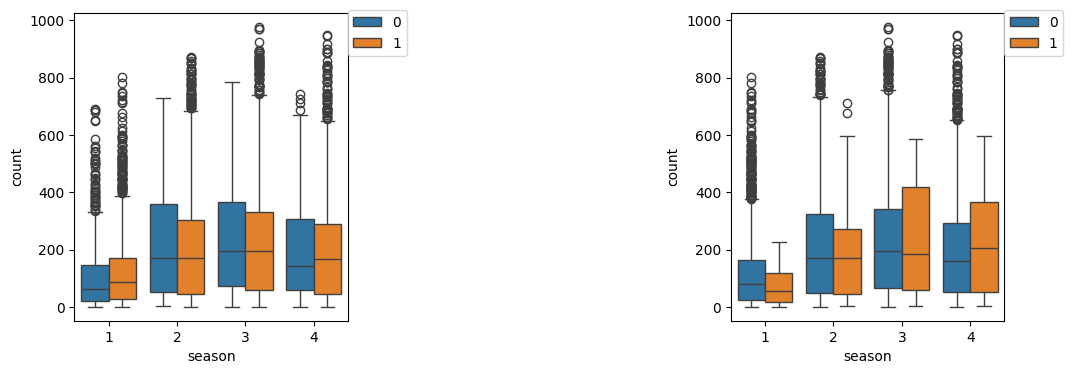

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(data=y_df, x='season', y='count', hue='workingday')
plt.legend(loc=(1, 0.86))
plt.subplot(1,3,3)
sns.boxplot(data=y_df, x='season', y='count', hue='holiday')
plt.legend(loc=(1, 0.86))
plt.show()

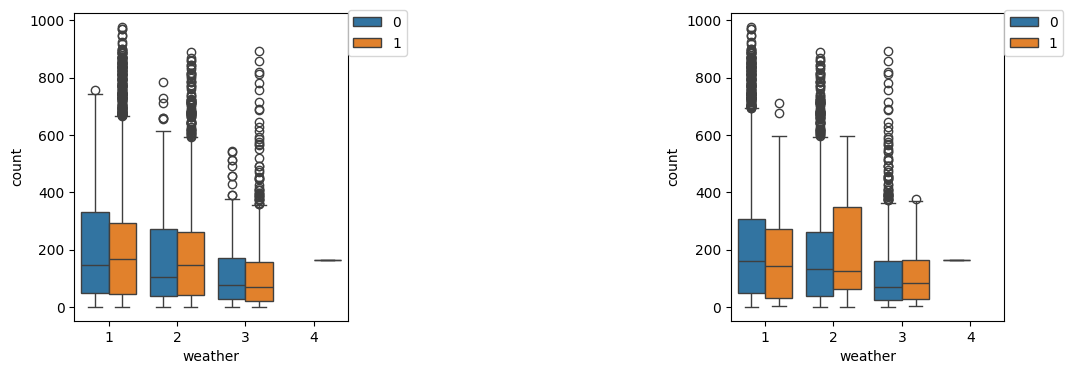

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(data=y_df, x='weather', y='count', hue='workingday')
plt.legend(loc=(1, 0.86))
plt.subplot(1,3,3)
sns.boxplot(data=y_df, x='weather', y='count', hue='holiday')
plt.legend(loc=(1, 0.86))
plt.show()

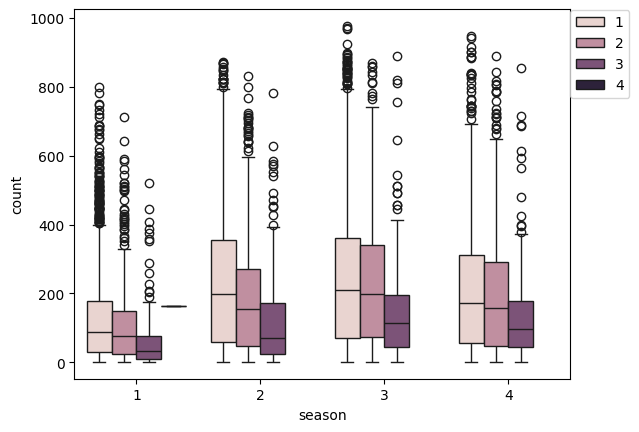

In [ ]:
sns.boxplot(data=y_df, x='season', y='count', hue='weather')
plt.legend(loc=(1, 0.76))
plt.show()

#Observation
- During weekends or holidays, the number of bike bookings has been greater than on working days, and working days also contain outliers.
- In fall, the number of bike bookings has been slightly larger than in summer and winter but significantly less during spring.
- The number of bike bookings has been higher during clear, few clouds, and partly cloudy conditions in comparison to other weather.
- There has been a strong positive correlation with registered users, who book more frequently in comparison to casual users.
- During weekends or holidays, the number of bike bookings has been greater than on working days, and working days also contain outliers.
- In fall, the number of bike bookings has been slightly larger than in summer and winter but significantly less during spring.
- The number of bike bookings has been higher during clear, few clouds, and partly cloudy conditions in comparison to other weather.
- There has been a strong positive correlation with registered users, who book more frequently in comparison to casual users.
-During the summer and fall seasons, when the weather was clear with few clouds or partly cloudy conditions, the number of bookings was the higher. However, during the spring season, when the weather was clear with few clouds or partly cloudy conditions, the number of bookings was the lower.
- The number of bookings was higher during the fall season when there was mist and cloudy, mist and broken clouds, and mist with few clouds. Conversely, during the spring season, when the weather was clear with few clouds or partly cloudy conditions, the number of bookings was lower.
- In the summer and fall seasons, higher booking numbers were observed when the weather featured light snow, light rain with thunderstorm and scattered clouds, and light rain with scattered clouds. Conversely, during the spring season, lower booking numbers were recorded when the weather included light snow, light rain with thunderstorm and scattered clouds, and light rain with scattered clouds.



#Check for outliers

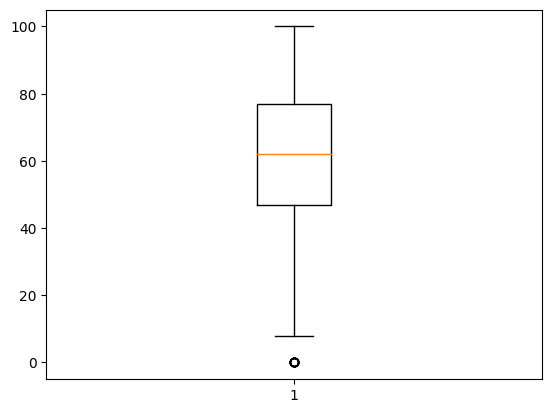

In [ ]:
plt.boxplot(y_df['humidity'])
plt.show()

In [ ]:
y_df['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [ ]:
Q1 = np.percentile(y_df['humidity'], 25)
Q1

47.0

In [ ]:
Q3 = np.percentile(y_df['humidity'], 75)
Q3

77.0

In [ ]:
IQR_humidity = Q3 = Q1
IQR_humidity

47.0

In [ ]:
lower_limit = Q1 - 1.5*IQR_humidity
lower_limit

-23.5

In [ ]:
(y_df['humidity'] < abs(lower_limit)).sum()

149

In [ ]:
(y_df['humidity'] < abs(lower_limit)).sum() / len(y_df)

0.013687304795149733

In [ ]:
clipped_humidity = np.clip(y_df['humidity'],
                            np.percentile(y_df['humidity'], 5),
                            np.percentile(y_df['humidity'], 95))
clipped_humidity

0        81
1        80
2        80
3        75
4        75
         ..
10881    50
10882    57
10883    61
10884    61
10885    66
Name: humidity, Length: 10886, dtype: int64

# Observation
- Mean = 61.886460 is affected by outliers
- Median (50 percentile) = 62.000000
- Upon Examination, 149 outliers were detected in the dataset. These outliers represent values that deviate significantly form the typical range of humidity.
- 1.36% of humidity are extream outliers.

[]

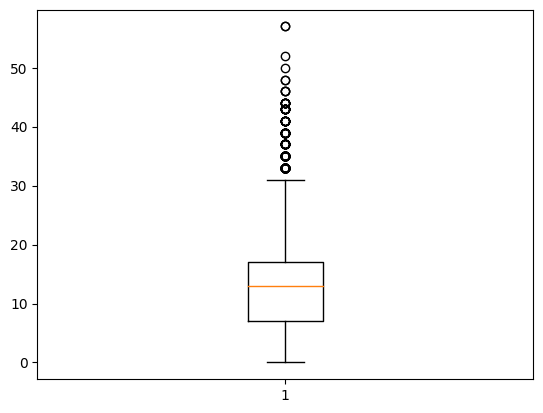

In [ ]:
plt.boxplot(y_df['windspeed'])
plt.plot()

In [ ]:
y_df['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [ ]:
Q1 = np.percentile(y_df['windspeed'], 25)
Q1

7.0015

In [ ]:
Q3 = np.percentile(y_df['windspeed'], 75)
Q3

16.9979

In [ ]:
IQR_windspeed = Q3 - Q1
IQR_windspeed

9.996400000000001

In [ ]:
upper_limit = Q3 + 1.5 * IQR_windspeed
upper_limit

31.992500000000003

In [ ]:
(y_df['windspeed'] > upper_limit).sum()

227

In [ ]:
(y_df['windspeed'] > upper_limit).sum() / len(y_df)

0.02085247106375161

In [ ]:
clipped_windspeed = np.clip(y_df['windspeed'],
                            np.percentile(y_df['windspeed'], 5),
                            np.percentile(y_df['windspeed'], 95))
clipped_windspeed

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 10886, dtype: float64

# Observation
- Mean = 12.799395 is affected by outliers
- Median (50 percentile) = 12.998000
- Upon Examination, 227 outliers were detected in the dataset. These outliers represent values that deviate significantly form the typical range of wind speed.
- 2.08% of wind speed are extream outliers.

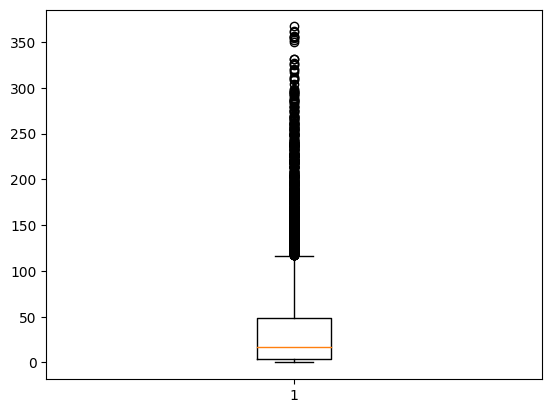

In [ ]:
plt.boxplot(y_df['casual'])
plt.show()

In [ ]:
y_df['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [ ]:
Q1 = np.percentile(y_df['casual'], 25)
Q1

4.0

In [ ]:
Q3 = np.percentile(y_df['casual'], 75)
Q3

49.0

In [ ]:
IQR_casual = Q3 - Q1
IQR_casual

45.0

In [ ]:
upper_limit = Q3 + 1.5 * IQR_casual
upper_limit

116.5

In [ ]:
(y_df['casual'] > upper_limit).sum()

749

In [ ]:
(y_df['casual'] > upper_limit).sum() / len(y_df)

0.06880396839977954

In [ ]:
clipped_casual = np.clip(y_df['casual'],
                            np.percentile(y_df['casual'], 5),
                            np.percentile(y_df['casual'], 95))
clipped_casual

0         3
1         8
2         5
3         3
4         0
         ..
10881     7
10882    10
10883     4
10884    12
10885     4
Name: casual, Length: 10886, dtype: int64

#Observation
- Mean = 36.021955 is affected by outliers
- Median (50 percentile) = 17.000000
- Upon Examination, 749 outliers were detected in the dataset. These outliers represent values that deviate significantly form the typical range of casual users.
- 6.88% of casual users are extream outliers.

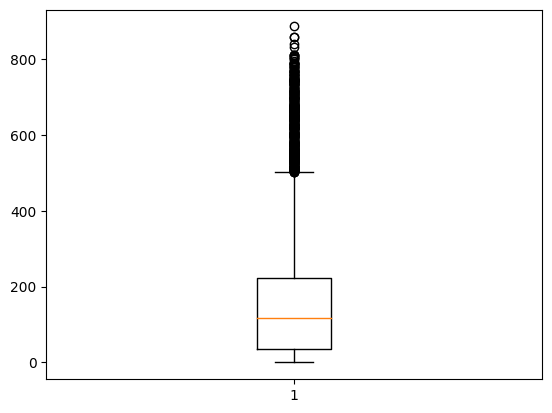

In [ ]:
plt.boxplot(y_df['registered'])
plt.show()

In [ ]:
y_df['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

In [ ]:
Q1 = np.percentile(y_df['registered'], 25)
Q1

36.0

In [ ]:
Q3 = np.percentile(y_df['registered'], 75)
Q3

222.0

In [ ]:
IQR_registered = Q3 - Q1
IQR_registered

186.0

In [ ]:
upper_limit = Q3 + 1.5 * IQR_registered
upper_limit

501.0

In [ ]:
(y_df['registered'] > upper_limit).sum()

423

In [ ]:
(y_df['registered'] > upper_limit).sum() / len(y_df)

0.03885724784126401

In [ ]:
clipped_registered = np.clip(y_df['registered'],
                            np.percentile(y_df['registered'], 5),
                            np.percentile(y_df['registered'], 95))
clipped_registered

0         13
1         32
2         27
3         10
4          4
        ... 
10881    329
10882    231
10883    164
10884    117
10885     84
Name: registered, Length: 10886, dtype: int64

#Observation
- Mean = 155.552177 is affected by outliers
- Median (50 percentile) = 118.000000
- Upon Examination, 423 outliers were detected in the dataset. These outliers represent values that deviate significantly form the typical range of registered users.
- 3.88% of registered users are extream outliers.

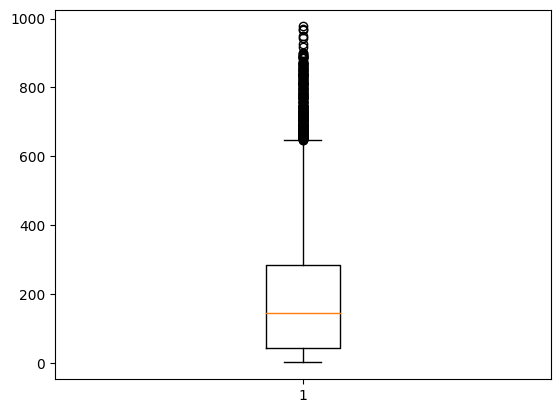

In [ ]:
plt.boxplot(y_df['count'])
plt.show()

In [ ]:
y_df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [ ]:
Q1 = np.percentile(y_df['registered'], 25)
Q1

36.0

In [ ]:
Q3 = np.percentile(y_df['registered'], 75)
Q3

222.0

In [ ]:
IQR_count = Q3 - Q1
IQR_count

186.0

In [ ]:
upper_limit = Q3 + 1.5 * IQR_count
upper_limit

501.0

In [ ]:
(y_df['count'] > upper_limit).sum()

793

In [ ]:
(y_df['count'] > upper_limit).sum() / len(y_df)

0.07284585706411906

In [ ]:
clipped_count = np.clip(y_df['count'],
                            np.percentile(y_df['count'], 5),
                            np.percentile(y_df['count'], 95))
clipped_count

0         16.0
1         40.0
2         32.0
3         13.0
4          5.0
         ...  
10881    336.0
10882    241.0
10883    168.0
10884    129.0
10885     88.0
Name: count, Length: 10886, dtype: float64

#Observation
- Mean = 191.574132 is affected by outliers
- Median (50 percentile) = 145.000000
- Upon Examination, 793 outliers were detected in the dataset. These outliers represent values that deviate significantly form the typical range of total rental bike.
- 7.28% of total rental bike are extream outliers.

In [ ]:
correlation = y_df.corr()
correlation

<ipython-input-64-d08bd30d3921>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = y_df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


[]

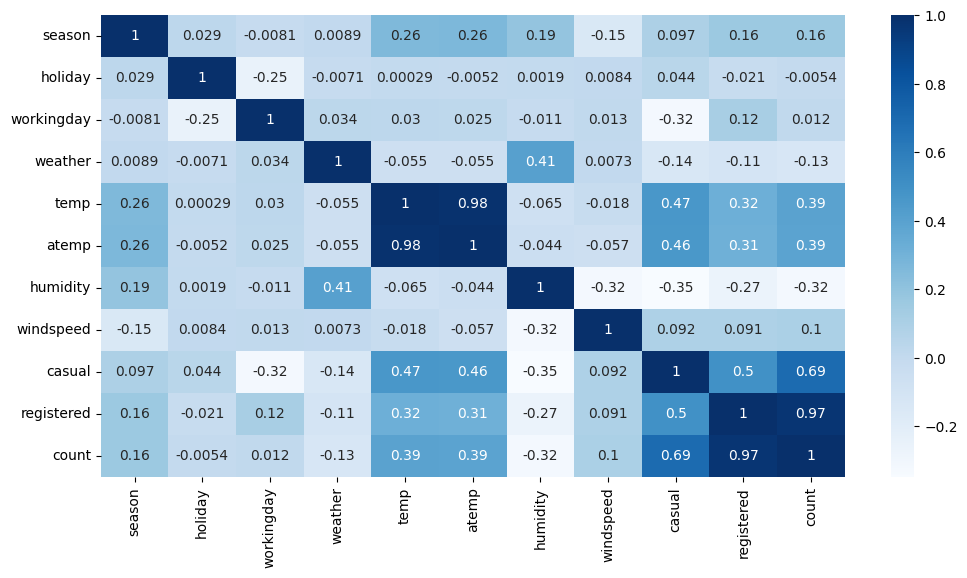

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation, cmap='Blues', annot=True)
plt.plot()

# Check if there any significant difference between the number of bike rides on Weekdays and Weekends?

# Formulate Hypothesis
- H0:- There is no significant diffence between the number of bike rides on weekdays and weekends.
- H1:- There is a significant difference between the number of bike rides on Weekdays and Weekends.

Set a significance level

In [ ]:
alpha = 0.05

Select 2- Sample Independent T-test for the test.

In [ ]:
data1 = y_df[y_df['workingday'] == 1]
weekdays = data1['count'].astype('int')
weekdays

47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7412, dtype: int64

In [ ]:
sample_mean1 = weekdays.mean()
sample_mean1

193.01187263896384

In [ ]:
data2 = y_df[y_df['workingday'] == 0]
weekends = data2['count'].astype('int')
weekends

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 3474, dtype: int64

In [ ]:
sample_mean2 = weekends.mean()
sample_mean2

188.50662061024755

In [ ]:
test_statistics, p_value = ttest_ind(weekdays, weekends, alternative='two-sided')

In [ ]:
test_statistics

1.2096277376026694

In [ ]:
p_value

0.22644804226361348

In [ ]:
if alpha > p_value:
  print("Reject Null, we can conclude that there is a difference between the number of bike rides on Weekdays and Weekends")
else:
  print("Fail to reject null hypothesis, we can conclude that there is no difference between the number of bike rides on Weekdays and Weekends")

Fail to reject null hypothesis, we can conclude that there is no difference between the number of bike rides on Weekdays and Weekends


#Conclusion
- alpha = 0.05
- p_value = 0.2264
- alpha < p_value.
- Fail to reject null hypothesis.
- We can conclude that there is no difference between the number of bike rides on Weekdays and Weekends.

# Check if the demand of bicycles on rent is the same for different Weather conditions?

#Formulate Hypothesis
- H0:- The demand of bicycles on rent is not same for different weather conditions.
- H1:- The demand of bicycles on rent is same for different weather conditions.


Set a significance level

In [ ]:
alpha = 0.05

Select One-way ANOVA test for the test.



In [ ]:
w1 = y_df[y_df['weather'] == 1]['count']
w2 = y_df[y_df['weather'] == 2]['count']
w3 = y_df[y_df['weather'] == 3]['count']
w4 = y_df[y_df['weather'] == 4]['count']

Test assumptions for one-way ANOVA
1. Variance within each group should almost the same.
2. The target on which we are computing the average should be normally distributed.


# 1. Test for variance

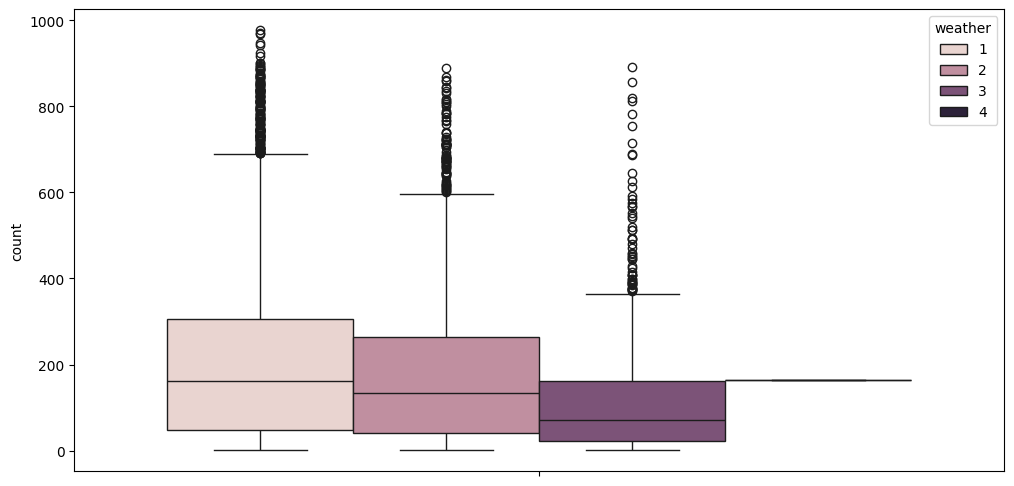

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=y_df, y='count', hue='weather')
plt.show()

<ipython-input-78-7cdb295945da>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = y_df,  x= 'count', hue = 'weather', kind = 'kde')


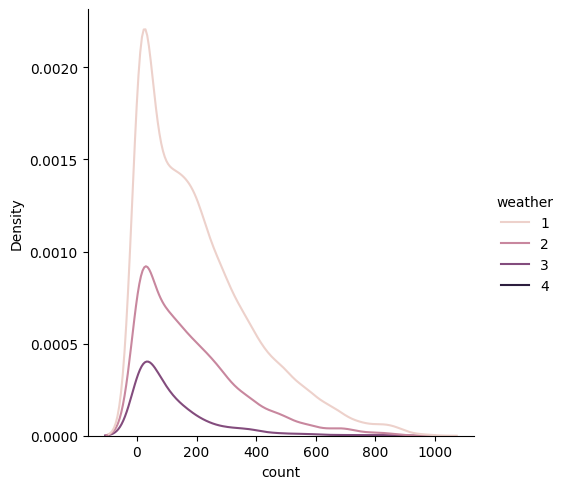

In [ ]:
sns.displot(data = y_df,  x= 'count', hue = 'weather', kind = 'kde')
plt.show()

#Observation
- Variance within each group is not same.

Statistical test for variance using levene
- H0:- Variance are same.
- H1:- Variance are different


In [ ]:
alpha = 0.05

In [ ]:
test_statistics, p_value = levene(w1, w2, w3, w4)

In [ ]:
test_statistics

54.85106195954556

In [ ]:
p_value

3.504937946833238e-35

#Conclusion:
- alpha = 0.05
- p_value = 3.504937946833238e-35
- alpha > p_value.
- Reject the null hypothesis, we conclude that variance across the differenct weather conditions are not same.

# 2. Test for Normality




In [ ]:
data1 = np.random.normal(0,1,10886)

In [ ]:
y_df['count_z'] = (y_df['count'] - y_df['count'].mean()) / y_df['count'].std()

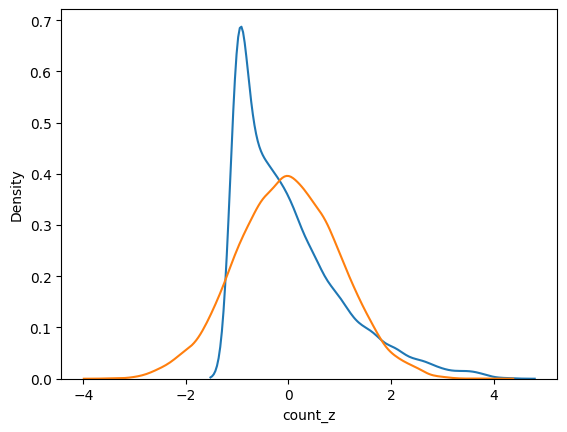

In [ ]:
sns.kdeplot(y_df['count_z'])
sns.kdeplot(data1)
plt.show()

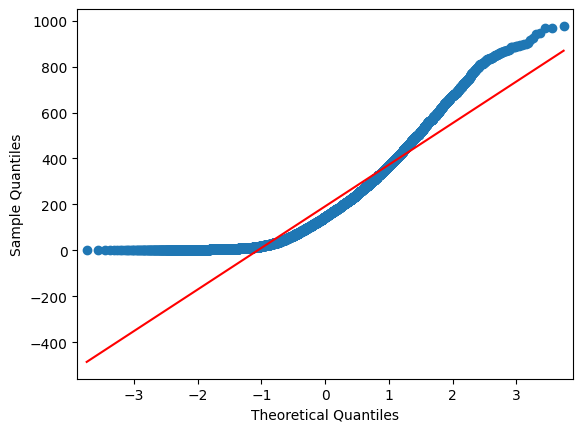

In [ ]:
qqplot(y_df['count'], line='s')
plt.show()

#Observation
- The target on which we are computing the average is not normally distributed.

Statistical test for normality

- H0: Data is normally distributed.
- H1: Data is not normally distributed.

In [ ]:
alpha = 0.05

In [ ]:
test_statistics, p_value = shapiro(y_df['count'].sample(100))

In [ ]:
test_statistics

0.9084655046463013

In [ ]:
p_value

3.6161247862764867e-06

# Conclusion
- alpha = 0.05
- p_value = 3.3081272476920276e-07
- alpha > p_value
- Reject the null hypothesis. So the data is not normally distributed.

#The assumptions of ANONA is not met, so we use Kruskal-Wallis test for the same.
- H0:- The demand of bicycles on rent is not same for different weather conditions.
- H1:- The demand of bicycles on rent is same for different weather conditions.

In [ ]:
alpha = 0.05

In [ ]:
test_statistics, p_value = kruskal(w1, w2, w3, w4)

In [ ]:
test_statistics

205.00216514479087

In [ ]:
p_value

3.501611300708679e-44

#Conclusion
- alpha = 0.05
- p_value = 3.501611300708679e-44
- alpha > p_value.
- Reject the null hypothesis, therefor we conclude that the demand of bicycles on rent is same for different weather conditions.

#Check if the demand of bicycles on rent is the same for different Seasons?

#Formulate Hypothesis
- H0:- The demand of bicycles on rent is not same for different seasons.
- H1:- The demand of bicycles on rent is same for different seasons.

Set a significance level

In [ ]:
alpha = 0.05

Select 0ne-way ANOVA test for the test.

In [ ]:
s1 = y_df[y_df['season'] == 1]['count']
s2 = y_df[y_df['season'] == 2]['count']
s3 = y_df[y_df['season'] == 3]['count']
s4 = y_df[y_df['season'] == 4]['count']

Test assumptions for one way ANOVA
1. Variance within each group should almost the same.
2. The target on which we are computing the average should be normally distributed.



# 1. Test for variance


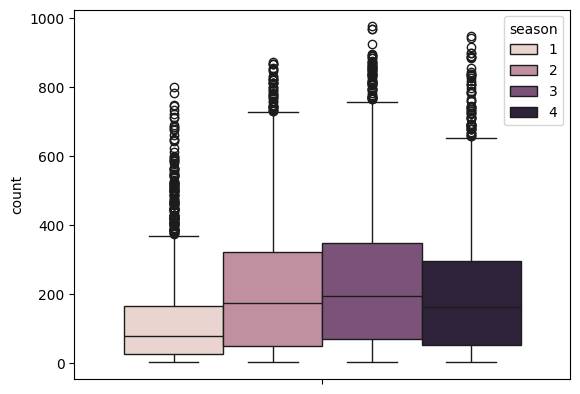

In [ ]:
sns.boxplot(data=y_df, y='count', hue='season')
plt.show()

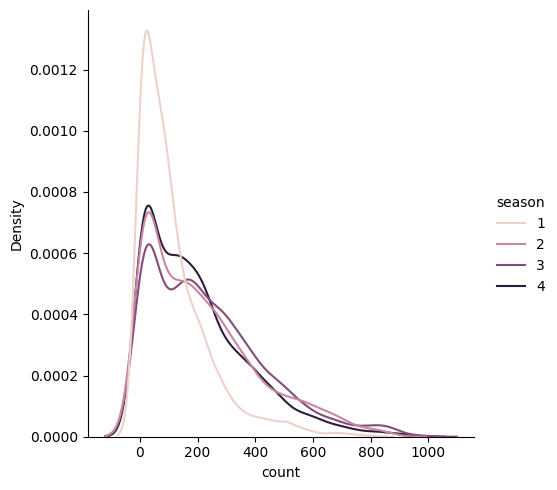

In [ ]:
sns.displot(data = y_df,  x= 'count', hue = 'season', kind = 'kde')
plt.show()

# Observation
- Variance within each group is not same.

Statistical test for variance.

- H0: Variance are same.
- H1: variance are difference.

In [ ]:
alpha = 0.05

In [ ]:
test_statistics, p_value = levene(s1, s2, s3, s4)

In [ ]:
test_statistics

187.7706624026276

In [ ]:
p_value

1.0147116860043298e-118

#Conclusion
- alpha = 0.05
- p_value = 1.0147116860043298e-118
- alpha > p_value.
- Reject the null hypothesis, we conclude that variance within each group is not same.

# 2. Test for Normality

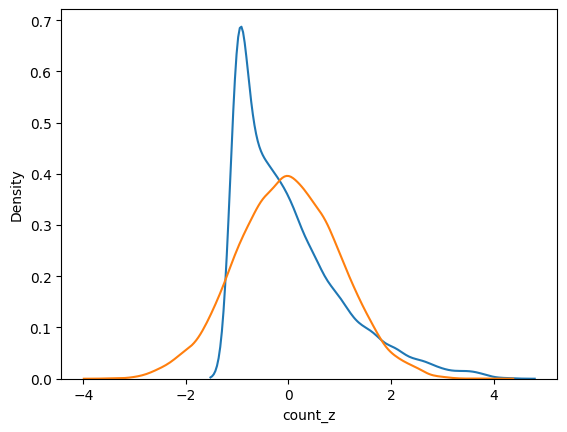

In [ ]:
sns.kdeplot(y_df['count_z'])
sns.kdeplot(data1)
plt.show()

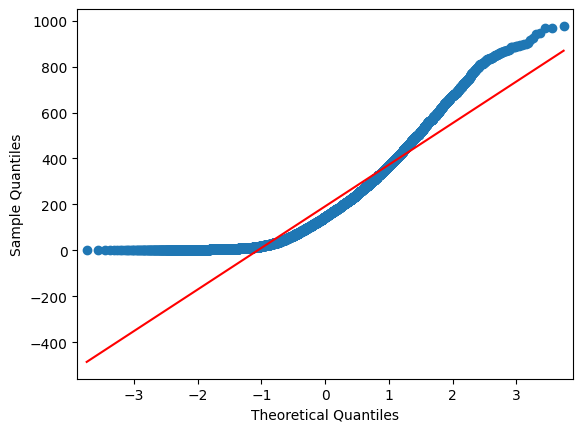

In [ ]:
qqplot(y_df['count'], line='s')
plt.show()

#Observation
- The target on which we are computing the average is not normally distributed.

Statistical test for normality


- H0: Data is normally distributed.
- H1: Data is not normally distributed.

In [ ]:
alpha = 0.05

In [ ]:
test_statistics, p_value = shapiro(y_df['count'].sample(100))

In [ ]:
test_statistics

0.8990514278411865

In [ ]:
p_value

1.276162493013544e-06

# Conclusion
- alpha = 0.05
- p_value = 1.5827557717784657e-06
- alpha > p_value
- Reject null hypothesis. So data is not normally distributed.

#The assumptions of ANONA is not met, so we use Kruskal-Wallis test for the same.
- H0:- The demand of bicycles on rent is not same for different seasons.
- H1:- The demand of bicycles on rent is same for different seasons.


In [ ]:
alpha = 0.05

In [ ]:
test_statistics, p_value = kruskal(s1, s2, s3, s4)

In [ ]:
test_statistics

699.6668548181988

In [ ]:
p_value

2.479008372608633e-151

# Conclusion
- alpha = 0.05
- p_value = 2.479008372608633e-151
- alpha > p_value
- Reject the null hypothesis. Therefore we conclude that the demand of bicycles on rent is same for different seasons.

#Check if the Weather conditions are significantly different during different Seasons?

#Formulate Hypothesis
- H0:- The Weather conditions are significantly same during different Seasons..
- H1:- The Weather conditions are significantly different during different Seasons.

Set a significance level

In [ ]:
alpha = 0.05

In [ ]:
observed = pd.crosstab(y_df['weather'], y_df['season'])
observed

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
test_statistics, p_value, *all = chi2_contingency(observed)

In [ ]:
test_statistics

49.15865559689363

In [ ]:
p_value

1.5499250736864862e-07

#conclusion
- alpha = 0.05
- p_value = 1.5499250736864862e-07
- alpha > p_value.
- Reject the null hypothesis. Therefore we conclude that the Weather conditions are significantly different during different Seasons.

# Insights
- There is 66.07% of bike was booked in Clear, Few clouds, partly cloudy.
- 26.03% of bikes have been booked in mist and cloudy conditions, mist and broken clouds, mist and few clouds, and mist.
- 7.89% of bikes were booked during light snow, light rain with scattered clouds, and light rain with scattered clouds and a thunderstorm.
- 0.01% of bikes were booked during heavy rain with ice pellets, thunderstorm, mist, as well as snow with fog.
- 97.14% bike has been booked during holiday.
- 68.09% bike has been booked during workingday while 31.91% bike was booked during not workingday.
- The highest number of bike bookings occurred during clear weather, few clouds, partly cloudy conditions, both on working days and holidays.
-During the summer and fall seasons, when the weather was clear with few clouds or partly cloudy conditions, the number of bookings was the higher. However, during the spring season, **when the weather was clear with few clouds or partly cloudy conditions**, the number of bookings was the lower.
- The number of bookings was higher during the fall season when there was mist and cloudy, mist and broken clouds, and mist with few clouds. Conversely, during the spring season, **when the weather was clear with few clouds or partly cloudy conditions**, the number of bookings was lower.
- In the summer and fall seasons, higher booking numbers were observed when the weather featured light snow, light rain with thunderstorm and scattered clouds, and light rain with scattered clouds. Conversely, during the spring season, lower booking numbers were recorded **when the weather included light snow, light rain with thunderstorm and scattered clouds, and light rain with scattered clouds**.
- There is no difference between the number of bike rides on Weekdays and Weekends.
- The demand of bicycles on rent is same for different weather conditions.
- The demand of bicycles on rent is same for different seasons.
- The Weather conditions are significantly different during different Seasons.

# Recommendations
- The number of bookings peaked when the weather was clear, with a few clouds and partly cloudy conditions, compared to all other weather conditions. Therefore, we recommend that company ensures a sufficient availability of bikes by increasing their inventory specifically during these favorable weather conditions in comparison to other weather conditions.

- The number of bookings peaked during the summer and fall seasons when the weather was clear, with a few clouds or partly cloudy conditions. Therefore, our recommendation to company is to improve bike availability by expanding their inventory, especially during these favorable seasons compared to when the weather was clear with few clouds or partly cloudy conditions.

- The fall season, characterized by mist and cloudy, mist and broken clouds, and mist with few clouds, witnessed a higher number of bookings. Therefore, our recommendation to company is to improve bike availability by expanding their inventory, especially during these favorable seasons compared to when the weather was clear with few clouds or partly cloudy conditions.

- During the summer and fall seasons, elevated booking numbers coincided with weather conditions characterized by light snow, light rain with thunderstorm and scattered clouds, and light rain with scattered clouds. Hence, we recommend company to enhance bike availability by increasing their inventory, particularly during these favorable seasons, in contrast to periods characterized by light snow, light rain with thunderstorm and scattered clouds, and light rain with scattered clouds.

- Statistically, more bikes are booked during holidays than on working days. Therefore, our recommendation to company is to focus more on holidays compared to working days.

- Statistically, the number of bike rides shows no significant difference between weekdays and weekends. Therefore, we recommend that company focuses on optimizing services for both these periods.

- Statistically, the consistent demand for bicycles for rent across different weather conditions and seasons, our recommendation to company is to prioritize service optimization during both these periods.

- Statistically, the Weather conditions are significantly different during different Seasons. Hence, our recommendation to company is to concentrate on enhancing services during both these season and weather conditions.
